## Training Material Outline: Visualizing Change with ALOS-2 Data Color Composites

This training material will guide users through the process of creating and interpreting color composites from ALOS-2 data to visualize changes over time.

**Module 1: Reading and Visualizing ALOS-2 Data in Python**

* 1.1 Setting up the Environment
    * Installing necessary libraries (rasterio, matplotlib, numpy, gdal).
    * Basic Python review: The code uses basic Python constructs, such as file paths, statements, and functions, to handle data and visualize it.
* 1.2 Loading ALOS-2 Data
    * The code explicitly demonstrates loading individual bands (HH polarization from three different dates) using rasterio.open and the .read(1) method. This fulfills the hands-on example requirement.
* 1.3 Basic Visualization
    * The code uses matplotlib.pyplot to visualize each band separately with appropriate colormaps (Reds, Greens, Blues). It provides a hands-on example with titles, colormaps, and color bars.

In [1]:
!pip install rasterio matplotlib numpy gdal scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Paths to the images for the RGB channels
# Set these to your specific files or modify to load bands from a single multi-band file
red_band_path = "/home/jovyan/shared/Sirinya/gen_ai/Shimpomachi_ngo/HH-191127.tif"
green_band_path = "/home/jovyan/shared/Sirinya/gen_ai/Shimpomachi_ngo/HH-200610.tif"
blue_band_path = "/home/jovyan/shared/Sirinya/gen_ai/Shimpomachi_ngo/HH-200610.tif"

# Open each band and read the data
with rasterio.open(red_band_path) as red_src:
    red = red_src.read(1)  # Read the red band

with rasterio.open(green_band_path) as green_src:
    green = green_src.read(1)  # Read the green band

with rasterio.open(blue_band_path) as blue_src:
    blue = blue_src.read(1)  # Read the blue band

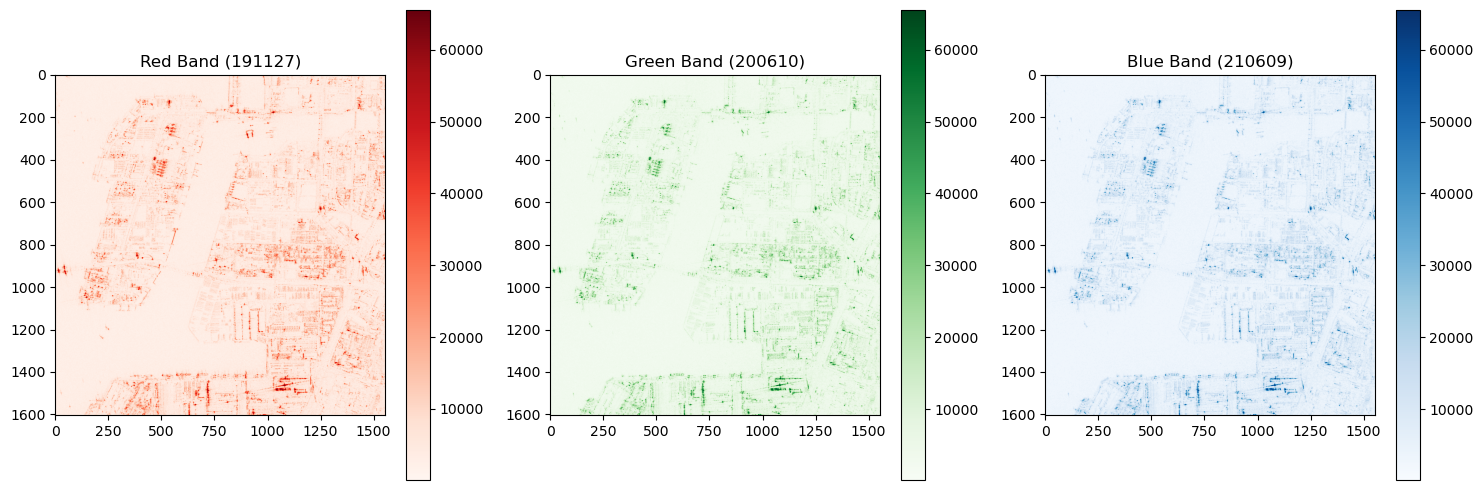

In [9]:
# Display the individual bands
plt.figure(figsize=(15, 5))

# Red Band
plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds')
plt.title('Red Band (191127)')
plt.colorbar()

# Green Band
plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens')
plt.title('Green Band (200610)')
plt.colorbar()

# Blue Band
plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues')
plt.title('Blue Band (210609)')
plt.colorbar()

plt.tight_layout()
plt.show()



**Module 2: Creating Color Composites for Change Detection**

* 2.1 Generating RGB Composites
    * Assign different time points to RGB channels, e.g., Red: Date 1, Green: Date 2, Blue: Date 3 or a synthetic band.
    * Use numpy.stack (or numpy.dstack) to combine the three bands into an RGB composite.
    * Normalize the image data using either a simple range-based method (min-max scaling) or percentile-based contrast stretching for better visualization.

In [10]:
# Stack the bands into an RGB image array
rgb_image = np.stack([red, green, blue], axis=-1)

# Normalize the bands for better visualization (optional)
rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())  # Normalize to [0, 1]

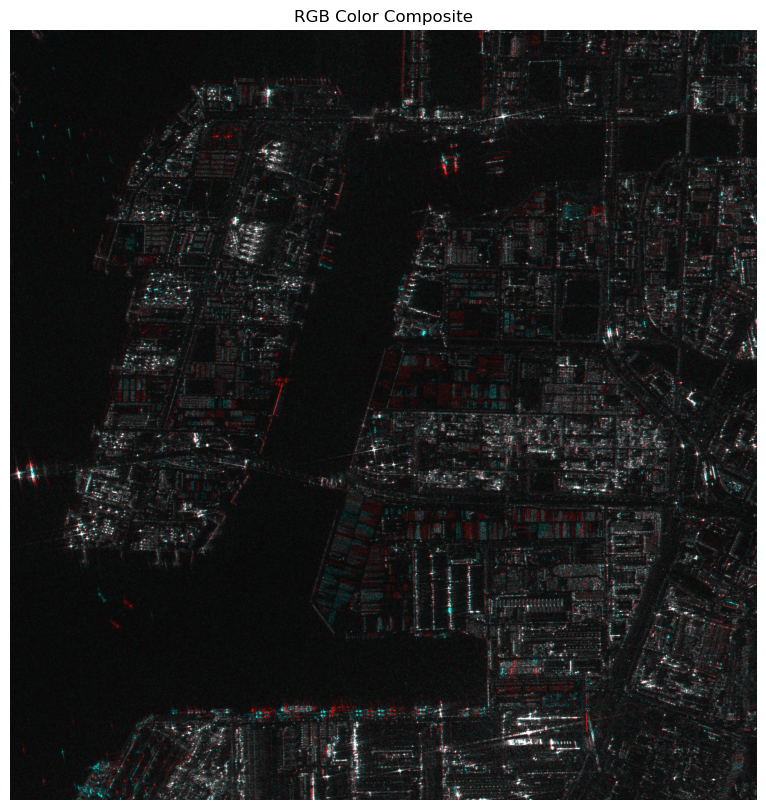

In [11]:
# Display the RGB composite
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.title("RGB Color Composite")
plt.axis("off")
plt.show()